## <b>KGLiDS APIs</b>

In [1]:
from api.api import KGLiDS
import pandas as pd
kglids = KGLiDS(endpoint='206.12.92.210', port=5820)

Connected to Stardog: https://cloud.stardog.com/


In [2]:
kglids.show_graph_info()

Information captured: 


,Datasets,Pipelines,Tables,Columns
0,101,969,418,9502



- <b><i> Running Adhoc-queries on our graph!</i></b> 

##### <b>1.  Customized queries </b>

In [3]:
query = """ 
SELECT ?source {
?source_id rdf:type    kglids:Source    ;
           schema:name ?source          . } """
kglids.query(query)

,source
0,kaggle


- <b><i> Pre-defined queries on our graph!</i></b> 

##### <b><i>Not comfortable with Sparql? No worries!</i></b> 
###### You can use several KGLiDS APIs to discover useful insights that remain locked inside your Data
<hr><br>

Note: 
- All query result(s) are returned in a form of <code>pandas.DataFrame</code> 
- KGLiDS is a transparent system, you can see the queries used by the system by setting <code>show_query = True</code> in case of every API you wish to use.

##### <b>2.  Retrieving dataset(s) </b>

In [4]:
kglids.get_datasets_info()

,Dataset,Number_of_tables
0,COVID-19 Corona Virus India Dataset,8
1,COVID-19 Dataset,6
2,COVID-19 Healthy Diet Dataset,5
3,COVID-19 Indonesia Dataset,1
4,COVID-19 World Vaccination Progress,2
...,...,...
96,uciml.red-wine-quality-cortez-et-al-2009,22
97,unitednations.international-greenhouse-gas-emi...,3
98,upadorprofzs.testes,8
99,vitaliymalcev.russian-passenger-air-service-20...,14


##### <b>3.  Retrieving table(s) </b>

In [5]:
kglids.get_tables_info()

Showing all available table(s): 


,Table,Dataset,Path_to_table
0,state_level_daily.csv,COVID-19 Corona Virus India Dataset,/data/shubham/datasets/data_lake/COVID-19 Coro...
1,state_level_latest.csv,COVID-19 Corona Virus India Dataset,/data/shubham/datasets/data_lake/COVID-19 Coro...
2,patients_data.csv,COVID-19 Corona Virus India Dataset,/data/shubham/datasets/data_lake/COVID-19 Coro...
3,tests_day_wise.csv,COVID-19 Corona Virus India Dataset,/data/shubham/datasets/data_lake/COVID-19 Coro...
4,nation_level_daily.csv,COVID-19 Corona Virus India Dataset,/data/shubham/datasets/data_lake/COVID-19 Coro...
...,...,...,...
413,pastry inventory.csv,ylchang.coffee-shop-sample-data-1113,/data/shubham/datasets/data_lake/ylchang.coffe...
414,201904 sales reciepts.csv,ylchang.coffee-shop-sample-data-1113,/data/shubham/datasets/data_lake/ylchang.coffe...
415,sales_outlet.csv,ylchang.coffee-shop-sample-data-1113,/data/shubham/datasets/data_lake/ylchang.coffe...
416,product.csv,ylchang.coffee-shop-sample-data-1113,/data/shubham/datasets/data_lake/ylchang.coffe...


In [6]:
kglids.get_tables_info(dataset='UK COVID-19 Data')


Showing table(s) for 'UK COVID-19 Data' dataset: 


,Table,Dataset,Path_to_table
0,UK_Devolved_Nations_COVID_Dataset.csv,UK COVID-19 Data,/data/shubham/datasets/data_lake/UK COVID-19 D...
1,UK_Local_Authority_UTLA_COVID_Dataset.csv,UK COVID-19 Data,/data/shubham/datasets/data_lake/UK COVID-19 D...
2,England_Regions_COVID_Dataset.csv,UK COVID-19 Data,/data/shubham/datasets/data_lake/UK COVID-19 D...
3,UK_National_Total_COVID_Dataset.csv,UK COVID-19 Data,/data/shubham/datasets/data_lake/UK COVID-19 D...
4,NEW_Official_Population_Data_ONS_mid-2019.csv,UK COVID-19 Data,/data/shubham/datasets/data_lake/UK COVID-19 D...
5,Populations_for_UK_and_Devolved_Nations.csv,UK COVID-19 Data,/data/shubham/datasets/data_lake/UK COVID-19 D...


###### <b>Enriching table(s) with more columns using KGLiDS's recommendations </b>

##### <b>4. Recommending tables by column name search</b>

In [7]:
df = kglids.search_tables_on(conditions=[['player', 'club']])
df

Showing recommendations as per the following conditions:
Condition =  [['player', 'club']]


,Dataset,Table,Number_of_columns,Number_of_rows,Path_to_table
0,FIFA 21 complete player dataset,players_21.csv,106.0,18944.0,/data/shubham/datasets/data_lake/FIFA 21 compl...
1,FIFA 21 complete player dataset,players_20.csv,106.0,18483.0,/data/shubham/datasets/data_lake/FIFA 21 compl...
2,FIFA 20 complete player dataset,players_20.csv,104.0,18278.0,/data/shubham/datasets/data_lake/FIFA 20 compl...
3,FIFA 21 complete player dataset,players_19.csv,106.0,18085.0,/data/shubham/datasets/data_lake/FIFA 21 compl...
4,FIFA 20 complete player dataset,players_19.csv,104.0,17770.0,/data/shubham/datasets/data_lake/FIFA 20 compl...
5,FIFA 20 complete player dataset,players_18.csv,104.0,17592.0,/data/shubham/datasets/data_lake/FIFA 20 compl...
6,FIFA 21 complete player dataset,players_18.csv,106.0,17954.0,/data/shubham/datasets/data_lake/FIFA 21 compl...
7,FIFA 21 complete player dataset,players_17.csv,106.0,17597.0,/data/shubham/datasets/data_lake/FIFA 21 compl...
8,FIFA 20 complete player dataset,players_17.csv,104.0,17009.0,/data/shubham/datasets/data_lake/FIFA 20 compl...
9,FIFA 20 complete player dataset,players_16.csv,104.0,14881.0,/data/shubham/datasets/data_lake/FIFA 20 compl...


##### <b>5. Recommending unionable tables (based on column names)</b>

In [8]:
recommendations_union = kglids.recommend_k_unionable_tables(df.iloc[0], k = 10)
recommendations_union

Showing the top-10 unionable table recommendations:


,Dataset,Recommended_table,Score,Path_to_table
0,FIFA 20 complete player dataset,players_20.csv,280.659,/data/shubham/datasets/data_lake/FIFA 20 compl...
1,FIFA 20 complete player dataset,players_19.csv,238.174,/data/shubham/datasets/data_lake/FIFA 20 compl...
2,FIFA 20 complete player dataset,players_18.csv,238.174,/data/shubham/datasets/data_lake/FIFA 20 compl...
3,FIFA 20 complete player dataset,players_17.csv,237.174,/data/shubham/datasets/data_lake/FIFA 20 compl...
4,FIFA 20 complete player dataset,players_15.csv,235.174,/data/shubham/datasets/data_lake/FIFA 20 compl...
5,FIFA 20 complete player dataset,players_16.csv,235.174,/data/shubham/datasets/data_lake/FIFA 20 compl...
6,FIFA22 OFFICIAL DATASET,FIFA19_official_data.csv,65.596,/data/shubham/datasets/data_lake/FIFA22 OFFICI...
7,FIFA22 OFFICIAL DATASET,FIFA17_official_data.csv,63.561,/data/shubham/datasets/data_lake/FIFA22 OFFICI...
8,FIFA22 OFFICIAL DATASET,FIFA18_official_data.csv,63.561,/data/shubham/datasets/data_lake/FIFA22 OFFICI...
9,FIFA22 OFFICIAL DATASET,FIFA22_official_data.csv,58.263,/data/shubham/datasets/data_lake/FIFA22 OFFICI...


##### <b>6. Recommending unionable tables (based on column values)</b>

In [9]:
recommendations_join = kglids.recommend_k_joinable_tables(df.iloc[0], k = 5)
recommendations_join

Showing the top-3 joinable table recommendations:


,Dataset,Recommended_table,Score,Path_to_table
0,FIFA 20 complete player dataset,players_20.csv,2.0,/data/shubham/datasets/data_lake/FIFA 20 compl...
1,FIFA22 OFFICIAL DATASET,FIFA22_official_data.csv,1.0,/data/shubham/datasets/data_lake/FIFA22 OFFICI...
2,FIFA22 OFFICIAL DATASET,FIFA21_official_data.csv,1.0,/data/shubham/datasets/data_lake/FIFA22 OFFICI...


##### <b>7. Visualizing the path between two joinable tables</b>

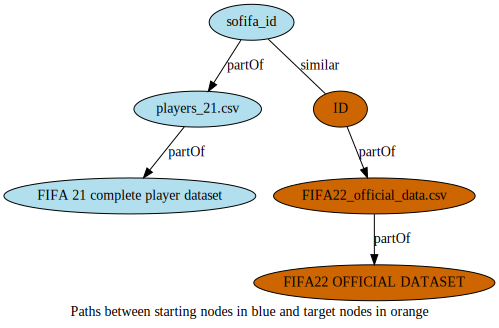

In [10]:
kglids.get_path_between_tables(df.iloc[0], recommendations_join.iloc[1], hops=1)

In [ ]:
# df1 = pd.read_csv(df.iloc[0].Path_to_table)
# df1

##### <b> Enrichment by Join </b>

In [ ]:
# df2 = pd.read_csv(recommendations_join.iloc[1].Path_to_table)
# df2

In [ ]:
# result_join = df1.merge(df2, left_on='sofifa_id', right_on='ID')
# result_join

##### <b>8. Search pipelines</b> 

In [ ]:
kglids.get_pipelines_info()

In [ ]:
kglids.get_pipelines_info(author='DanB')

#### <b>9. Most recent pipeline</b> 

In [ ]:
kglids.get_most_recent_pipeline()

In [ ]:
kglids.get_most_recent_pipeline(dataset='fedesoriano.hepatitis-c-dataset')

#### <b>10.<i> Top-k</i> scoring pipelines</b> 

In [ ]:
kglids.get_top_k_scoring_pipelines_for_dataset(k=5)

In [ ]:
kglids.get_top_k_scoring_pipelines_for_dataset(dataset='fedesoriano.hepatitis-c-dataset', k=5)

#### <b>11. Search classifiers used in a dataset</b> 

In [ ]:
df = kglids.search_classifier(dataset='fedesoriano.hepatitis-c-dataset')
df.head(10)

#### <b>12. Fetch hyperparameters </b> 

In [ ]:
kglids.get_hyperparameters(df.iloc[8])

#### <b>13. Visualize library utilization</b> 

In [ ]:
kglids.get_top_k_library_used()

In [ ]:
kglids.get_top_k_library_used(dataset='fedesoriano.hepatitis-c-dataset', k=15)

#### <b>14. Top-k library used for a specific task</b> 
tasks supported: classification, regression, visualization and clustering

In [ ]:
kglids.get_top_used_libraries(k = 5, task = 'classification')

In [ ]:
kglids.get_top_used_libraries(k = 5, task = 'regression')

In [ ]:
kglids.get_top_used_libraries(k = 5, task = 'visualization')

In [ ]:
kglids.get_top_used_libraries(k = 5, task = 'clustering')

In [25]:
kglids.get_top_used_libraries(k = 5, task = 'regression')

100%|██████████| 18/18 [00:00<00:00, 60205.32it/s]

Maximum 2 libraries were found for regression: 
sklearn, lightgbm


,Library,Module,Pipeline,Dataset
0,lightgbm,LGBMRegressor,Electric Price Prediction - LightGBM,nicholasjhana.energy-consumption-generation-pr...
1,sklearn,linear_model.LogisticRegression,Best of 14 Alg. to classify Mushrooms (100% acc.),uciml.mushroom-classification
2,sklearn,tree.ExtraTreeRegressor,U-Courses Exploration + Reviews Prediction,andrewmvd.udemy-courses
3,sklearn,linear_model.LinearRegression,U-Courses Exploration + Reviews Prediction,andrewmvd.udemy-courses
4,sklearn,linear_model.SGDRegressor,prediction energetique 3 - modelisation simple,city-of-seattle.sea-building-energy-benchmarking
5,sklearn,linear_model.LinearRegression,Marcos - Aprendizado de MÃ¡quinas - Treinament...,agajorte.zoo-animals-extended-dataset
6,sklearn,linear_model.LogisticRegression,Marcos - Aprendizado de MÃ¡quinas - Treinament...,agajorte.zoo-animals-extended-dataset
7,sklearn,ensemble.GradientBoostingRegressor,Intro to Parameter Tuning in Scikit [Acc :0.9175],uciml.red-wine-quality-cortez-et-al-2009
8,sklearn,linear_model.LinearRegression,Intro to Parameter Tuning in Scikit [Acc :0.9175],uciml.red-wine-quality-cortez-et-al-2009
9,sklearn,ensemble.RandomForestRegressor,Intro to Parameter Tuning in Scikit [Acc :0.9175],uciml.red-wine-quality-cortez-et-al-2009


In [26]:
kglids.get_top_used_libraries(k = 5, task = 'visualization')

100%|██████████| 112/112 [00:00<00:00, 9832.39it/s]

Showing the top 5 libraries for visualization: 
plotly, sklearn, bokeh, fbprophet, matplotlib


,Library,Module,Pipeline,Dataset
0,bokeh,plotting.figure,Exploring EPL,thefc17.epl-results-19932018
1,bokeh,plotting.show,Space Missions: EDA Plotly,agirlcoding.all-space-missions-from-1957
2,bokeh,plotting.show,ð Data Visualization Analysis,iabhishekofficial.mobile-price-classification
3,bokeh,plotting.show,What's this? Chai and DataScience?,rohanrao.chai-time-data-science
4,bokeh,plotting.show,Exploring EPL,thefc17.epl-results-19932018
...,...,...,...,...
90,sklearn,metrics.plot_precision_recall_curve,Nueral Network Regression VS Sklearn Algorithms,alexteboul.heart-disease-health-indicators-dat...
91,sklearn,metrics.plot_confusion_matrix,Log_KNN,alexteboul.heart-disease-health-indicators-dat...
92,sklearn,metrics.plot_roc_curve,Energy Price Prediction [ML],nicholasjhana.energy-consumption-generation-pr...
93,sklearn,metrics.plot_confusion_matrix,ML models Feature Importance,becksddf.churn-in-telecoms-dataset


In [27]:
kglids.get_top_used_libraries(k = 5, task = 'clustering')

100%|██████████| 8/8 [00:00<00:00, 18265.89it/s]

Maximum 2 libraries were found for clustering: 
scipy, yellowbrick


,Library,Module,Pipeline,Dataset
0,scipy,cluster.hierarchy.linkage,Machine Learning Tutorial for Beginners,uciml.biomechanical-features-of-orthopedic-pat...
1,scipy,cluster.hierarchy.dendrogram,Machine Learning Tutorial for Beginners,uciml.biomechanical-features-of-orthopedic-pat...
2,scipy,cluster.hierarchy.dendrogram,Unsupervised Learning KMeans and Hierarchical,uciml.biomechanical-features-of-orthopedic-pat...
3,scipy,cluster.hierarchy.linkage,EDA and Machine Learning,uciml.biomechanical-features-of-orthopedic-pat...
4,scipy,cluster.vq.vq,Super Hero Recommender based on Powers,claudiodavi.superhero-set
5,scipy,cluster.hierarchy.linkage,Clustering Methods on Stars Dataset,mariopasquato.star-cluster-simulations
6,yellowbrick,cluster.SilhouetteVisualizer,Catboost classifier for astronomical objects,muhakabartay.sloan-digital-sky-survey-dr16
7,yellowbrick,cluster.InterclusterDistance,Catboost classifier for astronomical objects,muhakabartay.sloan-digital-sky-survey-dr16
